<a href="https://colab.research.google.com/github/NDsasuke/OPTIMIZING-E-COMMERCE-KEYWORD-ANALYSIS-A-STUDY-ON-EFFECTIVE-PRODUCT-TITLE-RECOMMENDATIONS/blob/main/model3_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Import and remove unwanted columns and null records

In [ ]:
!wget https://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_Industrial_and_Scientific.json.gz --no-check-certificate -O input.gz

--2023-06-17 13:39:07--  https://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_Industrial_and_Scientific.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 83600786 (80M) [application/x-gzip]
Saving to: ‘input.gz’

input.gz            100%[===================>]  79.73M  47.5MB/s    in 1.7s    

2023-06-17 13:39:09 (47.5 MB/s) - ‘input.gz’ saved [83600786/83600786]



In [ ]:
import json
import gzip

data = []
with gzip.open('input.gz', 'r') as f:
    for l in f:
        data.append(json.loads(l.strip()))

titles = data[0].keys()
print(list(titles))


['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes']


In [ ]:
import pandas as pd

new_data = []

for record in data:
    new_record = { 'date': record['date'],'title': record['title']}
    new_data.append(new_record)

df = pd.DataFrame(new_data)

print(df.head())


                date                                              title
0                          Turning Technologies Response Card (RCRF-03)
1                     R-Cat 692782109 EKG Badge with Arrhythmia Pock...
2     August 7, 2007  Anatomical Chart Company's Illustrated Pocket ...
3  February 26, 2009   Joints of the Lower Extremities Anatomical Chart
4                          Turning Technologies ResponseCard XR RCXR-01


In [ ]:
# Print the number of records in the filtered dataset
print(f"There are {len(df)} records in the filtered dataset.")

There are 167442 records in the filtered dataset.


In [ ]:
# Convert "date" column to datetime data type, ignoring any non-date values
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [ ]:
# Drop rows with null values in the "date" column
df.dropna(subset=["date"], inplace=True)

In [ ]:
# Print the number of records in the filtered dataset
print(f"There are {len(df)} records in the filtered dataset.")

There are 44278 records in the filtered dataset.


In [ ]:
df.head()

date                                              title
2  2007-08-07  Anatomical Chart Company's Illustrated Pocket ...
3  2009-02-26   Joints of the Lower Extremities Anatomical Chart
7  2006-09-06      The Male Reproductive System Anatomical Chart
9  2005-08-04                    Hand and Wrist Anatomical Chart
10 2008-01-21                 The Spinal Nerves Anatomical Chart

Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Download the necessary resources for tokenization and stop words
nltk.download('punkt')
nltk.download('stopwords')

# Define the tokenize_title function
def tokenize_title(title):
    tokens = nltk.word_tokenize(title)
    return tokens

# Tokenize the titles in the dataset
df['tokens'] = df['title'].apply(tokenize_title)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load the stop words for English
stop_words = set(stopwords.words('english'))
stop_words.update([';', '&', 'quot', 'x', '(', ')', '-',',','.'])

# Tokenize the text in the 'tokens' column and remove stop words
keywords = []
for tokens in df['tokens']:
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.isalpha()]
    keywords.append(filtered_tokens)

# Add the 'keywords' column to the dataframe
df['keywords'] = keywords

In [ ]:
df.head()

title       date  \
2   Anatomical Chart Company's Illustrated Pocket ... 2007-08-07   
3    Joints of the Lower Extremities Anatomical Chart 2009-02-26   
7       The Male Reproductive System Anatomical Chart 2006-09-06   
9                     Hand and Wrist Anatomical Chart 2005-08-04   
10                 The Spinal Nerves Anatomical Chart 2008-01-21   

                                               tokens  \
2   [Anatomical, Chart, Company, 's, Illustrated, ...   
3   [Joints, of, the, Lower, Extremities, Anatomic...   
7   [The, Male, Reproductive, System, Anatomical, ...   
9               [Hand, and, Wrist, Anatomical, Chart]   
10           [The, Spinal, Nerves, Anatomical, Chart]   

                                             keywords  
2   [Anatomical, Chart, Company, Illustrated, Pock...  
3     [Joints, Lower, Extremities, Anatomical, Chart]  
7     [Male, Reproductive, System, Anatomical, Chart]  
9                    [Hand, Wrist, Anatomical, Chart]  
10                [Spinal, Nerves, Anatomical, Chart]

In [ ]:
# Drop the 'Keywords' column
df = df.drop('title', axis=1)
df = df.drop('tokens', axis=1)

Analyzing

In [ ]:
# Count the frequency of each keyword in the dataset
keyword_counts = {}
for tokens in df['keywords']:
    for token in tokens:
            if token in keyword_counts:
                keyword_counts[token] += 1
            else:
                keyword_counts[token] = 1

# Sort the keywords by frequency in descending order
sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 keywords by frequency
for keyword, count in sorted_keywords[:10]:
    print(keyword, count)

Steel 4021
Pack 3191
Screw 2929
Stainless 2578
Head 2572
Black 2320
Screws 2108
amp 1959
Tape 1898
Hillman 1761


In [ ]:
df.head()

date                                           keywords
2  2007-08-07  [Anatomical, Chart, Company, Illustrated, Pock...
3  2009-02-26    [Joints, Lower, Extremities, Anatomical, Chart]
7  2006-09-06    [Male, Reproductive, System, Anatomical, Chart]
9  2005-08-04                   [Hand, Wrist, Anatomical, Chart]
10 2008-01-21                [Spinal, Nerves, Anatomical, Chart]

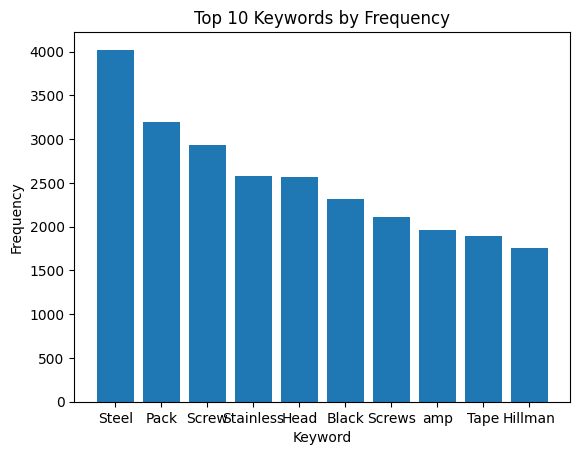

In [ ]:
import matplotlib.pyplot as plt

# Display a bar chart of the top 10 keywords by frequency
top_keywords = dict(sorted_keywords[:10])
plt.bar(top_keywords.keys(), top_keywords.values())
plt.title('Top 10 Keywords by Frequency')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()

<ipython-input-48-824a703c5e72>:24: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  keyword_matrix[top_keywords].plot(figsize=(10,6))


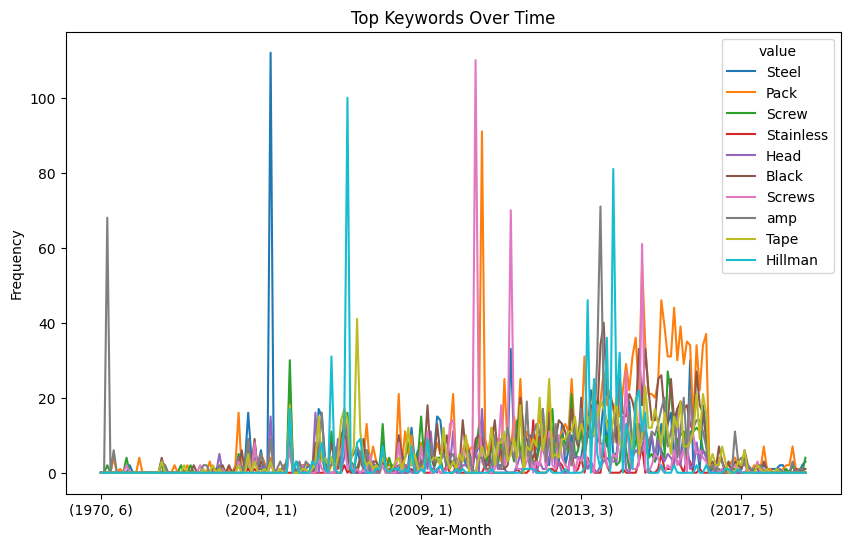

In [ ]:
# Convert "date" column to datetime data type, ignoring any non-date values
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Remove rows with missing values in the "date" column
df.dropna(subset=["date"], inplace=True)

# Extract the month and year from the "date" column
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

# Extract the keywords for each row
def extract_keywords(tokens):
    return [token for token in tokens if token in top_keywords]

df['value'] = df['keywords'].apply(extract_keywords)

# Group the data by month, year, and keyword, and count the number of occurrences
monthly_counts = df.groupby([df['month'], df['year'], df['value'].apply(lambda x: ', '.join(x))]).size().reset_index(name='count')

# Pivot the data to create a matrix with years and months as rows and keywords as columns
keyword_matrix = monthly_counts.pivot(index=['year', 'month'], columns='value', values='count').fillna(0)

# Create a time series plot of the top keywords
keyword_matrix[top_keywords].plot(figsize=(10,6))
plt.title('Top Keywords Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.show()



<ipython-input-49-d1b62c7fe73a>:8: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  keyword_matrix[top_keywords].plot(figsize=(10,6))


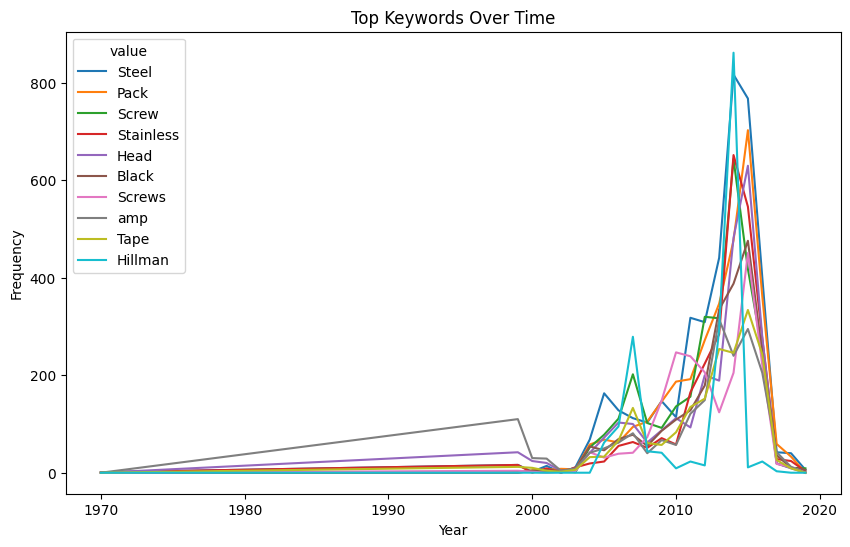

In [ ]:
# Group the data by year and keyword, and count the number of occurrences
yearly_counts = df.explode('value').groupby([df['date'].dt.year, 'value']).size().reset_index(name='count')

# Pivot the data to create a matrix with years as rows and keywords as columns
keyword_matrix = yearly_counts.pivot(index='date', columns='value', values='count').fillna(0)

# Create a time series plot of the top keywords
keyword_matrix[top_keywords].plot(figsize=(10,6))
plt.title('Top Keywords Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

df = df.drop('value', axis=1)

In [ ]:
df.head()

date                                           keywords  month  year
2  2007-08-07  [Anatomical, Chart, Company, Illustrated, Pock...      8  2007
3  2009-02-26    [Joints, Lower, Extremities, Anatomical, Chart]      2  2009
7  2006-09-06    [Male, Reproductive, System, Anatomical, Chart]      9  2006
9  2005-08-04                   [Hand, Wrist, Anatomical, Chart]      8  2005
10 2008-01-21                [Spinal, Nerves, Anatomical, Chart]      1  2008

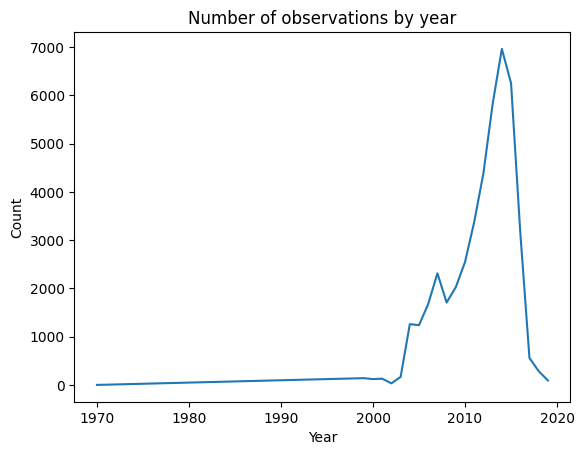

In [ ]:
# Count the number of observations per year
counts_by_year = df['year'].value_counts().sort_index()

# Create a line plot of the counts by year
plt.plot(counts_by_year.index, counts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of observations by year')
plt.show()

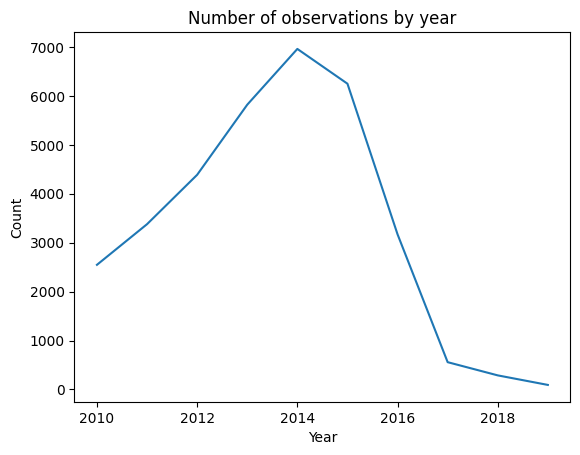

In [ ]:
# Filter the rows to keep only those with dates in or after 2010
df = df.loc[df['date'].dt.year >= 2010]

# Count the number of observations per year
counts_by_year = df['year'].value_counts().sort_index()

# Create a line plot of the counts by year
plt.plot(counts_by_year.index, counts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of observations by year')
plt.show()

Procces for model input

In [ ]:
# Split the data into training and testing sets based on the year
train_df = df.loc[df['date'].dt.year < 2017]
test_df = df.loc[df['date'].dt.year >= 2017]

In [ ]:
train_df.head()

date                                           keywords  month  year
20  2014-07-27         [UHU, Contact, Gel, Super, Glue, Adhesive]      7  2014
46  2010-02-17                          [Delta, Charcoal, Filter]      2  2010
166 2010-07-24  [Silicone, Bulb, Gasket, Self, Adhesive, Weath...      7  2010
238 2010-01-20  [General, Tools, Inside, Calipers, Inch, Jaw, ...      1  2010
339 2015-02-19  [Shepherd, Hardware, Hooded, Ball, Stem, Caste...      2  2015

In [ ]:
from collections import Counter

# Create an empty list to store the target variable
target = []

# Iterate through each group of year and month
for (year, month), group in train_df.groupby(['year', 'month']):
    # Count the frequency of each keyword in the group
    counter = Counter(keyword for keywords in group['keywords'] for keyword in keywords)
    # Select the 10 most common keywords as the target variable
    if len(counter) > 0:
        target_keywords = [t[0] for t in counter.most_common(10)]
    else:
        target_keywords = None
    # Add the target variable to the list
    target.append((year, month, target_keywords))

# Convert the list to a pandas DataFrame
target = pd.DataFrame(target, columns=['year', 'month', 'target'])

# Preview the target variable
print(target.head())

# Merge the target variable with the original dataset based on the year and month columns
train_df = pd.merge(train_df, target, on=['year', 'month'])

   year  month                                             target
0  2010      1  [Steelex, Insert, Tool, Sign, Plastic, Cylinde...
1  2010      2  [Mat, Width, Screws, Length, Floor, Black, Mat...
2  2010      3  [Screw, Tape, Screws, Hardware, Pack, Inch, Bo...
3  2010      4  [Screws, per, Star, Screw, Gauge, amp, Ring, D...
4  2010      5  [Tradespro, Assortment, Pack, Insulated, Gauge...


First model

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-05-21 07:55:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-21 07:55:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-21 07:55:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [ ]:
# load the meta data

import subprocess
import json

# Extract the compressed file using 7zip
subprocess.run(['7z', 'e', '/content/glove.6B.zip'])

CompletedProcess(args=['7z', 'e', '/content/glove.6B.zip'], returncode=2)

In [ ]:
train_df.head()

date                                           keywords  month  year  \
0 2014-07-27         [UHU, Contact, Gel, Super, Glue, Adhesive]      7  2014   
1 2014-07-03        [Steelex, Nylon, Furniture, Caster, Swivel]      7  2014   
2 2014-07-03        [Steelex, Nylon, Furniture, Caster, Swivel]      7  2014   
3 2014-07-10  [Zona, Rotating, Bur, Holder, Shank, Burs, Dee...      7  2014   
4 2014-07-24                              [Asphalt, Repair, lb]      7  2014   

                                              target  
0  [Valve, Ball, Pack, White, Lead, Free, HiLetgo...  
1  [Valve, Ball, Pack, White, Lead, Free, HiLetgo...  
2  [Valve, Ball, Pack, White, Lead, Free, HiLetgo...  
3  [Valve, Ball, Pack, White, Lead, Free, HiLetgo...  
4  [Valve, Ball, Pack, White, Lead, Free, HiLetgo...

In [ ]:
from keras.models import Model
from keras.layers import Embedding, LSTM, Dense, Input, Concatenate, TimeDistributed, RepeatVector
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming 'year' column in your DataFrame
train1_df = train_df[train_df['year'] < 2015]
test1_df = train_df[train_df['year'] >= 2015]

# Tokenize the keywords
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train1_df['keywords'])
tokenizer.fit_on_texts(test1_df['keywords'])
sequences_keywords_train = tokenizer.texts_to_sequences(train1_df['keywords'])
sequences_keywords_test = tokenizer.texts_to_sequences(test1_df['keywords'])

# Tokenize the targets
tokenizer_target = Tokenizer()
tokenizer_target.fit_on_texts(train1_df['target'])
tokenizer_target.fit_on_texts(test1_df['target'])
sequences_target_train = tokenizer_target.texts_to_sequences(train1_df['target'])
sequences_target_test = tokenizer_target.texts_to_sequences(test1_df['target'])

# One-hot encode the month column
mon_train = to_categorical(train1_df['month'] - 1)  # subtract 1 to get 0-indexed labels
mon_test = to_categorical(test1_df['month'] - 1)  # subtract 1 to get 0-indexed labels

# Pad the sequences to a fixed length
max_length = 100
padded_sequences_keywords_train = pad_sequences(sequences_keywords_train, maxlen=max_length)
padded_sequences_keywords_test = pad_sequences(sequences_keywords_test, maxlen=max_length)
padded_sequences_target_train = pad_sequences(sequences_target_train, maxlen=max_length)
padded_sequences_target_test = pad_sequences(sequences_target_test, maxlen=max_length)

# Load pre-trained embeddings
embeddings_index = {}
with open('glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix for the words in the vocabulary
num_words = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# padded sequnce as X
X_train = padded_sequences_keywords_train
X_test = padded_sequences_keywords_test

# Use only the target sequences for y (not the month)
y_train = padded_sequences_target_train
y_test = padded_sequences_target_test

# Define the two inputs
input_keywords = Input(shape=(max_length,), name='input_keywords')
input_month = Input(shape=(12,), name='input_mon')

# Embedding layer for keywords
embedding_layer = Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_keywords)

# LSTM layer
lstm_layer = LSTM(128, return_sequences=True)(embedding_layer)

# Repeat the month vector to match the sequence length
repeat_vector = RepeatVector(max_length)(input_month)

# Concatenate the output of LSTM layer with the month input
concat_layer = Concatenate(axis=-1)([lstm_layer, repeat_vector])

# TimeDistributed Dense layer
output = TimeDistributed(Dense(num_words, activation='softmax'))(concat_layer)

# Create the model
model1 = Model(inputs=[input_keywords, input_month], outputs=output)

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Split the training and test data into keywords and month parts
X_train_keywords = X_train
X_train_month = mon_train
X_test_keywords = X_test
X_test_month = mon_test

# Remove the month from the targets
y_train = y_train
y_test = y_test

# Reshape the targets to be 3D
y_train = np.expand_dims(y_train, -1)
y_test = np.expand_dims(y_test, -1)

# Fit the model
history = model1.fit([X_train_keywords, X_train_month], y_train, epochs=100, validation_data=([X_test_keywords, X_test_month], y_test))


Epoch 1/100
722/722 [==============================] - 67s 89ms/step - loss: 1.1729 - accuracy: 0.8921 - val_loss: 0.7216 - val_accuracy: 0.9000
Epoch 2/100
722/722 [==============================] - 73s 102ms/step - loss: 0.6400 - accuracy: 0.9002 - val_loss: 0.6888 - val_accuracy: 0.8986
Epoch 3/100
722/722 [==============================] - 64s 89ms/step - loss: 0.5893 - accuracy: 0.9010 - val_loss: 0.6812 - val_accuracy: 0.8969
Epoch 4/100
722/722 [==============================] - 73s 102ms/step - loss: 0.5470 - accuracy: 0.9015 - val_loss: 0.6638 - val_accuracy: 0.8962
Epoch 5/100
722/722 [==============================] - 74s 102ms/step - loss: 0.5163 - accuracy: 0.9018 - val_loss: 0.6610 - val_accuracy: 0.8934
Epoch 6/100
722/722 [==============================] - 74s 102ms/step - loss: 0.5092 - accuracy: 0.9019 - val_loss: 0.6712 - val_accuracy: 0.8932
Epoch 7/100
722/722 [==============================] - 74s 102ms/step - loss: 0.4826 - accuracy: 0.9023 - val_loss: 0.6864 - v

model 1 evaluation

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model1.evaluate([X_test_keywords, X_test_month], y_test)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


295/295 [==============================] - 11s 39ms/step - loss: 0.8782 - accuracy: 0.8925
Test Loss: 0.8782282471656799
Test Accuracy: 0.8925421833992004


In [ ]:
!pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
import Levenshtein as lev

# Calculate and print BLEU score for some predictions
for i in range(5):
    prediction = model1.predict([X_test_keywords[i:i+1], X_test_month[i:i+1]])
    predicted_sequence = np.argmax(prediction, axis=-1)
    print("Actual:", tokenizer_target.sequences_to_texts([np.squeeze(y_test[i])]))
    print("Predicted:", tokenizer_target.sequences_to_texts([np.squeeze(predicted_sequence)]))
    print("BLEU Score:", sentence_bleu([np.squeeze(y_test[i])], np.squeeze(predicted_sequence[0])))
    print("Edit Distance:", lev.distance(str(np.squeeze(y_test[i])), str(np.squeeze(predicted_sequence[0]))))
    print("\n")


1/1 [==============================] - 0s 351ms/step
Actual: ['tape switch pack black kit wheel uxcell color white set']
Predicted: ['steel group multipurpose screw steel chain matting plated socket pcs mfd']
BLEU Score: 0.8883095774019244
Edit Distance: 22


1/1 [==============================] - 0s 21ms/step
Actual: ['tape switch pack black kit wheel uxcell color white set']
Predicted: ['steel group pack chain size proline microfarad base dual mfd pack']
BLEU Score: 0.8907943837053445
Edit Distance: 23


1/1 [==============================] - 0s 18ms/step
Actual: ['tape switch pack black kit wheel uxcell color white set']
Predicted: ['steel group multipurpose head screw edge microfarad entrance waterhog fashion fashion']
BLEU Score: 0.8883095774019244
Edit Distance: 24


1/1 [==============================] - 0s 20ms/step
Actual: ['tape switch pack black kit wheel uxcell color white set']
Predicted: ['steel group multipurpose screw steel chain matting plated socket pcs mfd']
BLEU Sco

In [ ]:
def remove_duplicates(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

# Calculate and print BLEU score for some predictions
for i in range(5):
    prediction = model1.predict([X_test_keywords[i:i+1], X_test_month[i:i+1]])
    predicted_sequence = np.argmax(prediction, axis=-1)[0]  # Get the first sequence
    predicted_sequence_no_duplicates = remove_duplicates(predicted_sequence)  # Remove duplicates in the sequence
    print("Actual:", tokenizer_target.sequences_to_texts([np.squeeze(y_test[i])]))
    print("Predicted:", tokenizer_target.sequences_to_texts([predicted_sequence_no_duplicates]))
    print("BLEU Score:", sentence_bleu([np.squeeze(y_test[i])], predicted_sequence_no_duplicates))
    print("Edit Distance:", lev.distance(str(np.squeeze(y_test[i])), str(predicted_sequence_no_duplicates)))
    print("\n")

1/1 [==============================] - 0s 20ms/step
Actual: ['tape switch pack black kit wheel uxcell color white set']
Predicted: ['steel group multipurpose screw chain matting plated socket pcs mfd']
BLEU Score: 3.064241432537179e-235
Edit Distance: 388


1/1 [==============================] - 0s 19ms/step
Actual: ['tape switch pack black kit wheel uxcell color white set']
Predicted: ['steel group pack chain size proline microfarad base dual mfd']
BLEU Score: 3.6440177136590864e-235
Edit Distance: 389


1/1 [==============================] - 0s 21ms/step
Actual: ['tape switch pack black kit wheel uxcell color white set']
Predicted: ['steel group multipurpose head screw edge microfarad entrance waterhog fashion']
BLEU Score: 3.064241432537179e-235
Edit Distance: 386


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Actual: ['tape switch pack black kit wheel uxcell color white set']
Predicted: ['steel group multipurpose screw chain matting plated socket pcs mfd']
BLEU Score: 3.064241432537179e-235
Edit Distance: 388


1/1 [==============================] - 0s 22ms/step
Actual: ['tape switch pack black kit wheel uxcell color white set']
Predicted: ['steel group pack chain size proline microfarad base dual mfd']
BLEU Score: 3.6440177136590864e-235
Edit Distance: 389




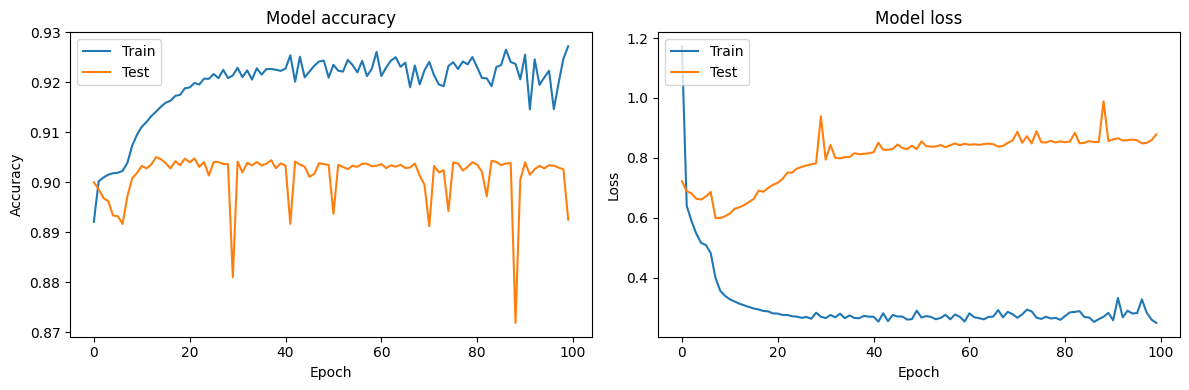

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
